# PISA Data Investigation: What matters most in scoring?
## by Laila Shahreen

## Investigation Overview

In this investigation, I wanted to look at the following questions.

* Are there differences in achievement based on teacher practices and attitudes?
* Are there differences in achievement based on gender, location, or student attitudes?
* Does socio-economic status matter?

## Dataset Overview

The PISA 2012 dataset is consisted of scores in math,reading and science and many other attributes of 485490 students. Total columns are 636. In order to explore our area of interest, the dataset is minimized to 124974 data points after preliminary wrangling and excluding missing values. The attributes are scores in three subjects along with  Country, Gender, Formative Assesment, Teacher Support, Teacher Student Relations,Socio_economic_cultural Status,Learning Time and Outside School Study Time.We used the above variables to answer our questions.

In [62]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [63]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012.csv',encoding='ISO-8859-1')

In [64]:
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [65]:
#Only necessary columns for our analysis are kept.
df = df[['CNT','ST04Q01','OUTHOURS','PV1MATH','PV2MATH',
         'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ',
         'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE',
         'PV4SCIE', 'PV5SCIE', 'TCHBEHFA','STUDREL','ESCS','TEACHSUP','SMINS','LMINS','MMINS']]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 25 columns):
CNT         485490 non-null object
ST04Q01     485490 non-null object
OUTHOURS    308799 non-null float64
PV1MATH     485490 non-null float64
PV2MATH     485490 non-null float64
PV3MATH     485490 non-null float64
PV4MATH     485490 non-null float64
PV5MATH     485490 non-null float64
PV1READ     485490 non-null float64
PV2READ     485490 non-null float64
PV3READ     485490 non-null float64
PV4READ     485490 non-null float64
PV5READ     485490 non-null float64
PV1SCIE     485490 non-null float64
PV2SCIE     485490 non-null float64
PV3SCIE     485490 non-null float64
PV4SCIE     485490 non-null float64
PV5SCIE     485490 non-null float64
TCHBEHFA    314678 non-null float64
STUDREL     313860 non-null float64
ESCS        473648 non-null float64
TEACHSUP    316371 non-null float64
SMINS       270914 non-null float64
LMINS       282866 non-null float64
MMINS       283303 non-null

In [67]:
#Drop duplicate and null values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [68]:
# Find the mean score for all subjects and drop the unnecessary columns

df['Avg Math Score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['Avg Reading Score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['Avg Science Score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5

df['Max Math Score'] = df[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].max(axis=1)
df['Max Reading Score'] = df[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].max(axis=1)
df['Max Science Score'] = df[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].max(axis=1)

df.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)

In [69]:
#Rename the columns

df.rename({'CNT': 'Country', 'ST04Q01': 'Gender',
           'STUDREL': 'Teacher Student Relations', 'TCHBEHFA': 'Formative Assesment',
           'OUTHOURS': 'Out_of_School Study Time',
           'Avg Science Score': 'Average Science Score',
           'Avg Math Score': 'Average Math Score',
           'Avg Reading Score': 'Average Reading Score',
           'ESCS': 'Socio_economic_cultural Status',
          'TEACHSUP':'Teacher Support','SMINS':'Learning Time Science','LMINS':'Learning Time Language','MMINS':'Learning Time Math'}, axis='columns', inplace=True)

In [70]:
# Select high outliers for the learning time total, using criteria eyeballed from the plot
high_outliers_math = (df['Learning Time Math'] > 600)

print(high_outliers_math.sum())
print(df.loc[high_outliers_math,:])

772
                         Country  Gender  Out_of_School Study Time  \
4930        United Arab Emirates    Male                      37.0   
5062        United Arab Emirates  Female                      13.0   
5128        United Arab Emirates    Male                      24.0   
5349        United Arab Emirates  Female                      15.0   
5353        United Arab Emirates  Female                       4.0   
...                          ...     ...                       ...   
479975  United States of America    Male                      11.0   
480954                   Vietnam  Female                      22.0   
483110                   Vietnam  Female                      45.0   
483885                   Vietnam    Male                       7.0   
484450                   Vietnam    Male                      48.0   

        Formative Assesment  Teacher Student Relations  \
4930                 0.5054                       1.13   
5062                -0.5945            

In [71]:
high_outliers_language = (df['Learning Time Language'] > 600)

print(high_outliers_language.sum())
print(df.loc[high_outliers_language,:])

599
                         Country  Gender  Out_of_School Study Time  \
5062        United Arab Emirates  Female                      13.0   
5355        United Arab Emirates  Female                       4.0   
5356        United Arab Emirates  Female                       1.0   
5679        United Arab Emirates  Female                      43.0   
5969        United Arab Emirates  Female                      12.0   
...                          ...     ...                       ...   
479161  United States of America    Male                       7.0   
480067  United States of America    Male                       6.0   
480325  United States of America    Male                       8.0   
480404  United States of America    Male                       3.0   
480468  United States of America  Female                      21.0   

        Formative Assesment  Teacher Student Relations  \
5062                -0.5945                      -0.79   
5355                 0.7644            

In [72]:
high_outliers_science = (df['Learning Time Science'] > 600)

print(high_outliers_science.sum())
print(df.loc[high_outliers_science,:])

1341
                     Country  Gender  Out_of_School Study Time  \
4911    United Arab Emirates    Male                       5.0   
4928    United Arab Emirates    Male                      15.0   
4930    United Arab Emirates    Male                      37.0   
5022    United Arab Emirates  Female                      17.0   
5038    United Arab Emirates  Female                      28.0   
...                      ...     ...                       ...   
483110               Vietnam  Female                      45.0   
483196               Vietnam    Male                      11.0   
483941               Vietnam    Male                      26.0   
485233               Vietnam  Female                      40.0   
485362               Vietnam    Male                      13.0   

        Formative Assesment  Teacher Student Relations  \
4911                 0.2509                      -0.02   
4928                -0.0092                      -0.02   
4930                 0.5054 

In [73]:
# Remove outliers
df = df.loc[-high_outliers_math & -high_outliers_language & -high_outliers_science,:]

In [74]:
    
# this will replace the incorrect names with correct one 
df.replace({'Country': {'Connecticut (USA)': 'USA', 'Florida (USA)': 'USA','Massachusetts (USA)': 'USA','United States of America': 'USA',
                       'Hong Kong-China':'China', 'China-Shanghai':'China', 'Macao-China':'China','Macao':'China','Hong Kong':'China','Czech Republic':'Czech',
                       'Czechia':'Czech','Korea, Republic of':'Korea','United States':'USA','Chinese Taipei':'Taiwan'}},inplace = True)  
#replace_names_with_correct_ones()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Average Score Distribution in Science, Math and Reading

>From the three plots below on math, science and reading score, it looks like the distribution for math score falls in normal distribution. Science and reading score are slightly skewed towards left.The math and lierature ditribution match with the unimodal and normal distribution. For Science we can see a slight right skew.
    

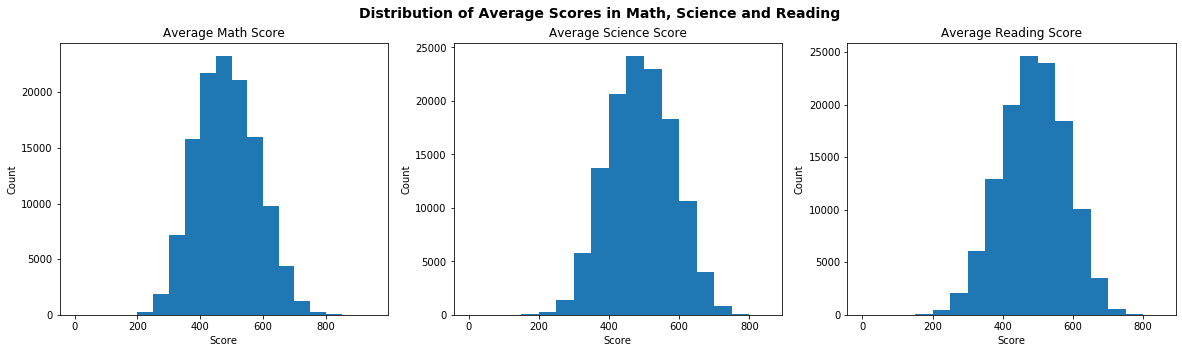

In [75]:
fig, ax = plt.subplots(ncols=3, figsize = [20,5])
binsize = 50
variables = ['Average Math Score', 'Average Science Score', 'Average Reading Score']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(0, max(df[var])+binsize, binsize)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('Score')
    ax[i].set_ylabel('Count')
    ax[i].set_title('{}'.format(var))
plt.suptitle('Distribution of Average Scores in Math, Science and Reading', fontsize =14, weight ='bold')
plt.show()

## Outside School Study Time Distribution
50 % of Students spent at least  8 hrs outside school time, although a point of max time spent is 180 hrs from dataset. The distribution falls within normal distribution.

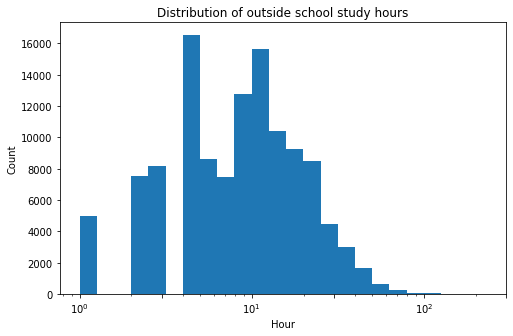

In [76]:
## Outside School Study Time Distribution
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['Out_of_School Study Time'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8,5])
plt.hist(data = df, x = 'Out_of_School Study Time', bins = bins)
plt.xscale('log')
plt.xticks([1,3,10,30,100,300])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Distribution of outside school study hours')
plt.show()


## Location Distribution
The location distribution shows that Mexico, Italy, Canada, China and Brazil have more larger no of students since those countries are larger and have higher population compared to others.

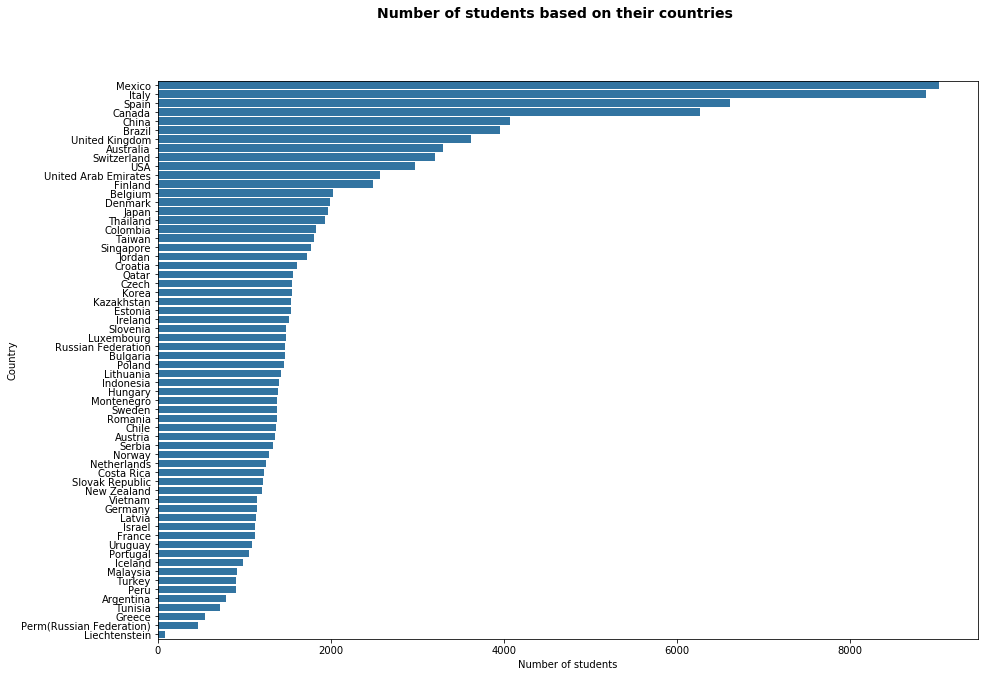

In [77]:
# Find number of students from different countries
plt.figure(figsize = [14.7,10.27])
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'Country', color = base_color, order=df['Country'].value_counts().index,orient="h")
plt.suptitle('Number of students based on their countries',fontsize = 14, weight ='bold')
plt.xticks(rotation='horizontal');
plt.xlabel('Number of students');

## Teacher's Attitude and Practices Distribution
Teacher Support and Formative Assesment distribution have shifted toward left with two modes. Most students pretty much received some attention in some lessons in case of formative assesment. In case of teacher support, at least they got some sort of support in some lessons but also showing similar count where no support was present. Student teacher relationship looks normal distribution. Most answers falls in strongly disagreement to disagree zone.  

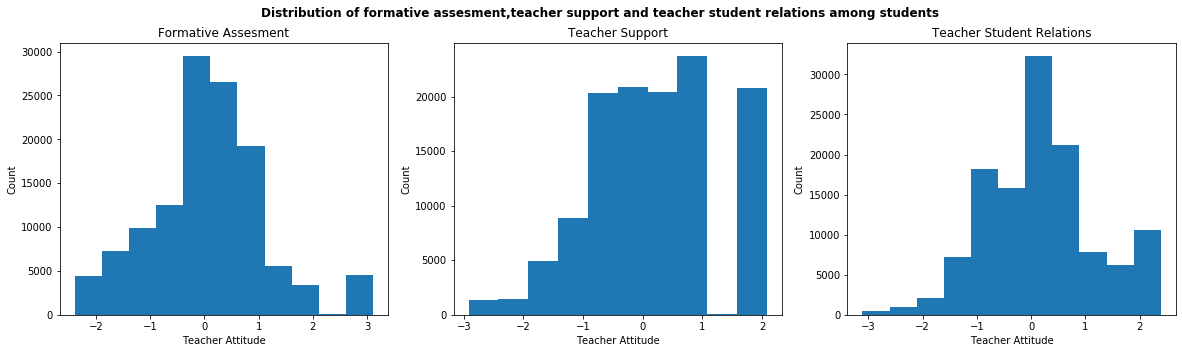

In [78]:
fig, ax = plt.subplots(ncols=3, figsize = [20,5])
binsize = 0.5
variables = ['Formative Assesment', 'Teacher Support', 'Teacher Student Relations']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var]), max(df[var])+binsize, binsize)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('Teacher Attitude')
    ax[i].set_ylabel('Count')
    ax[i].set_title('{}'.format(var))
    plt.suptitle('Distribution of formative assesment,teacher support and teacher student relations among students',weight ='bold')

## How all the variables are correlated?
* Surprisingly, study time outside school or learning time for each subject are poorly correlated with average scores for math, science and reading. Learning time is slightly better than outside school study time though.
* On the otherhand, socio-economic status shows better relation with average scores.
* Teachers' practices and attitude have negetive co-relation coefficients with with scores. Collectively they are supposed to contribute to improve score but here the picture is opposite. This might be worth trying to explore more.

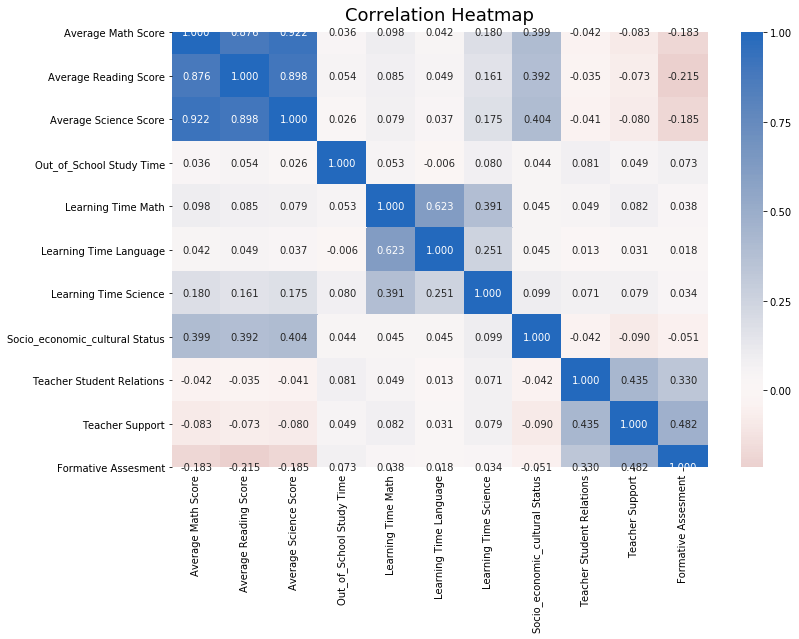

In [79]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 'Out_of_School Study Time','Learning Time Math','Learning Time Language','Learning Time Science','Socio_economic_cultural Status','Teacher Student Relations','Teacher Support','Formative Assesment']
categorical_vars = ['Country','Gender']

# Correlation plot
plt.figure(figsize = [12, 8])
heatmap = sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

## Reflection of Gender on Avegare Score

Although the average scores are pretty close for male and felame, but female students have higher reading score on average than male students.

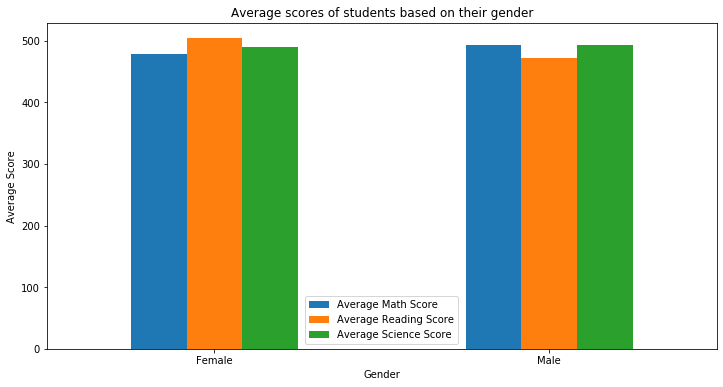

In [80]:
gender_group = df.groupby(['Gender']).mean()[['Average Math Score', 'Average Reading Score', 'Average Science Score']]
ax = gender_group.plot.bar(figsize=(12,6));
plt.title('Average scores of students based on their gender')
plt.ylabel('Average Score')
plt.xticks(rotation='horizontal');

## Location Based Average Score

* From the following plot of average math, science and reading against the location, east asian countries are showing dominance. China is all along maintainting the highest average score. Japan is at second place for science and reading score where as Singapore is third. Singapore has second highest average math score.

* Among the top ten countries, Germany, Taiwan, Korea, Belgium, Finland, Greece, Poland, Netherlands, Switzerland,Liechtenstein, Ireland are also present.

* Indonesia, Peru, Qatar, Brazil and Argentina reamins in the worst five list.

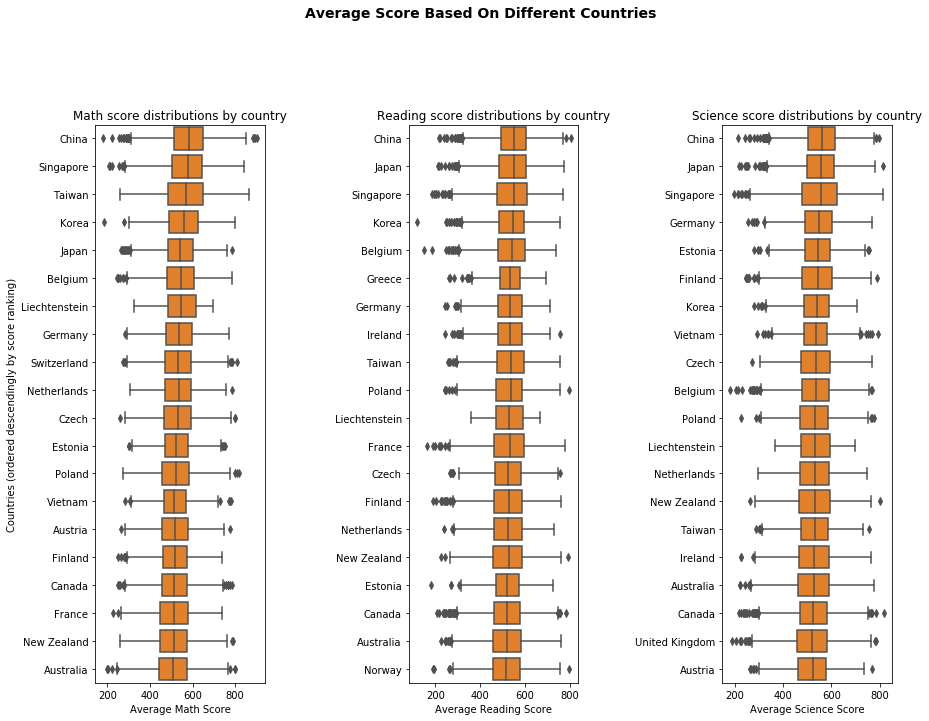

In [81]:
#Score distribution based on location
plt.figure(figsize = [14.27, 10.27])
plt.subplots_adjust(wspace = 0.85) # adjust spacing between subplots, in order to show long country names nicely
plt.suptitle("Average Score Based On Different Countries", y = 1.04,fontsize = 14, weight = "bold")
#plt.tight_layout();
math_score_country_order = df.groupby('Country')['Average Math Score'].mean().sort_values(ascending = False).index[:20]
reading_score_country_order = df.groupby('Country')['Average Reading Score'].mean().sort_values(ascending = False).index[:20]
science_score_country_order = df.groupby('Country')['Average Science Score'].mean().sort_values(ascending = False).index[:20]

plt.subplot(1, 3, 1)
sb.boxplot(y = df['Country'],x = df['Average Math Score'], order = math_score_country_order, color = sb.color_palette()[1]);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by country');

plt.subplot(1, 3, 2)
sb.boxplot( y = df['Country'],x = df['Average Reading Score'], order = reading_score_country_order, color = sb.color_palette()[1]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.boxplot( y = df['Country'],x = df['Average Science Score'], order = science_score_country_order, color = sb.color_palette()[1]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');

## Does Teachers' Attitude and Practices Matter?

So, the teachers' attitude and practices are not really dictating any better scoring. Here, we see that the low scoring countries reflects higher teacher support(above 0), higher teacher student relations(1) and Formative assesment(between 0-1). This finding aligns with our previous exploration in correlation matrix plot where we saw negetive coefficient for all of the teachers' practices with average scores.

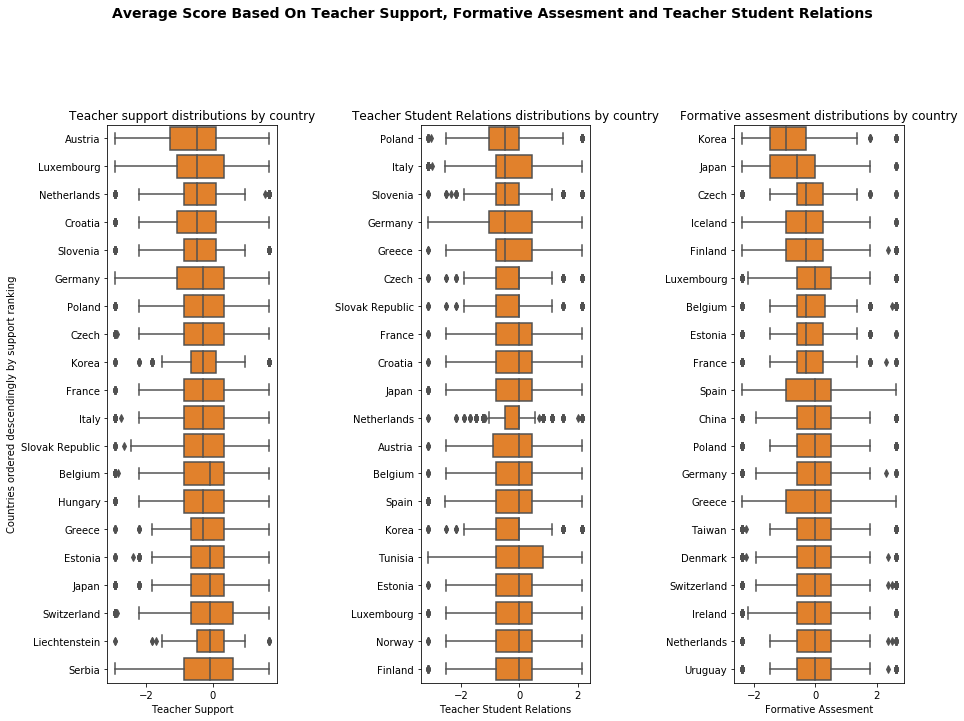

In [82]:
# Find out tecahers' attitude and practices based on location

plt.figure(figsize = [14.27, 10.27])
plt.subplots_adjust(wspace = 0.85) # adjust spacing between subplots, in order to show long country names nicely
plt.suptitle("Average Score Based On Teacher Support, Formative Assesment and Teacher Student Relations", y = 1.04,fontsize = 14, weight = "bold")
teacher_support_country_order = df.groupby('Country')['Teacher Support'].mean().sort_values(ascending = True).index[:20]
teacher_student_rel_country_order = df.groupby('Country')['Teacher Student Relations'].mean().sort_values(ascending = True).index[:20]
formative_assesment_country_order = df.groupby('Country')['Formative Assesment'].mean().sort_values(ascending = True).index[:20]

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Teacher Support'], y = df['Country'], order = teacher_support_country_order, color = sb.color_palette()[1]);
plt.ylabel('Countries ordered descendingly by support ranking')
plt.title('Teacher support distributions by country');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Teacher Student Relations'], y = df['Country'], order = teacher_student_rel_country_order, color = sb.color_palette()[1]);
plt.ylabel(''); # Remove the redundant label
plt.title('Teacher Student Relations distributions by country');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Formative Assesment'], y = df['Country'], order = formative_assesment_country_order, color = sb.color_palette()[1]);
plt.ylabel(''); # Remove the redundant label
plt.title('Formative assesment distributions by country');

## Does Socio_Economic_Cultural Status Dictate Performance?
Regarding socio-economic status, European countries,North America, Australia along with few Asian countries such as Japan, Qatar, Korea, Israel are solvent.Interestingly, China is not among them even though it has average highest score in math, science and reading.

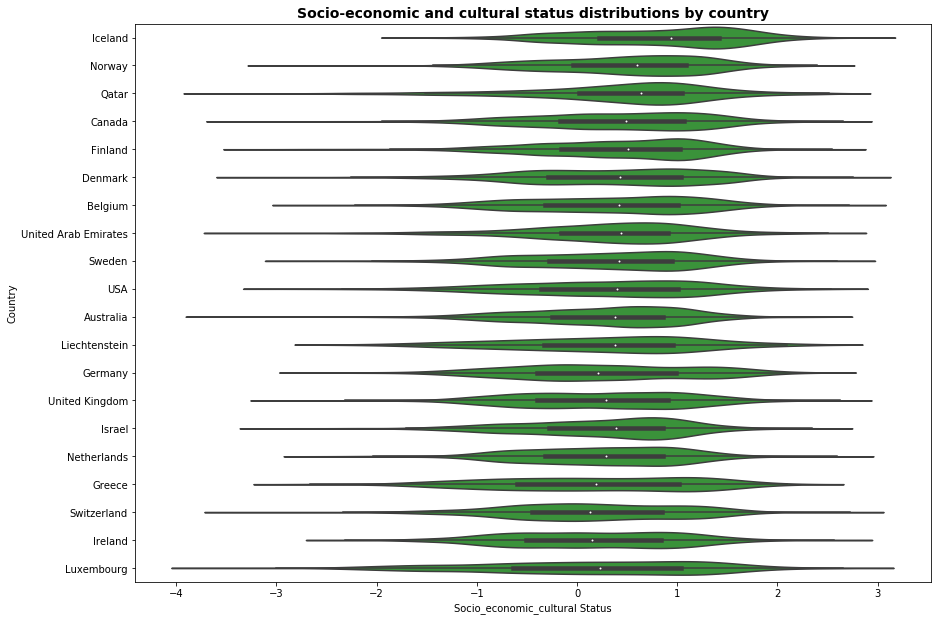

In [83]:
# Effect of socio-economic-cultural status on students' achievement

socio_econo_cultural_country_order = df.groupby('Country')['Socio_economic_cultural Status'].mean().sort_values(ascending = False).index[:20]

plt.figure(figsize = [14.27, 10.27])
sb.violinplot(x = df['Socio_economic_cultural Status'], y = df['Country'], order = socio_econo_cultural_country_order, color = sb.color_palette()[2]);
plt.ylabel('Country'); 
plt.title('Socio-economic and cultural status distributions by country',fontsize = 14, weight = "bold");

## Average Math Score vs Socio_Economic_Cultural Status Across Countries

The heat map below somehow can reflect the scenario of socio_economic_cultural status of different countries. Even though the high scorers in math are within small fraction of total students, but they are from better socio_economic status irrespective of country. 

In [84]:
top_five_countries = ['China','Japan','Singapore','Taiwan','Korea']
df_new = df[['Country', 'Average Math Score', 'Average Reading Score', 'Average Science Score','Socio_economic_cultural Status','Out_of_School Study Time','Formative Assesment','Teacher Support']][df['Country'].isin(top_five_countries)]



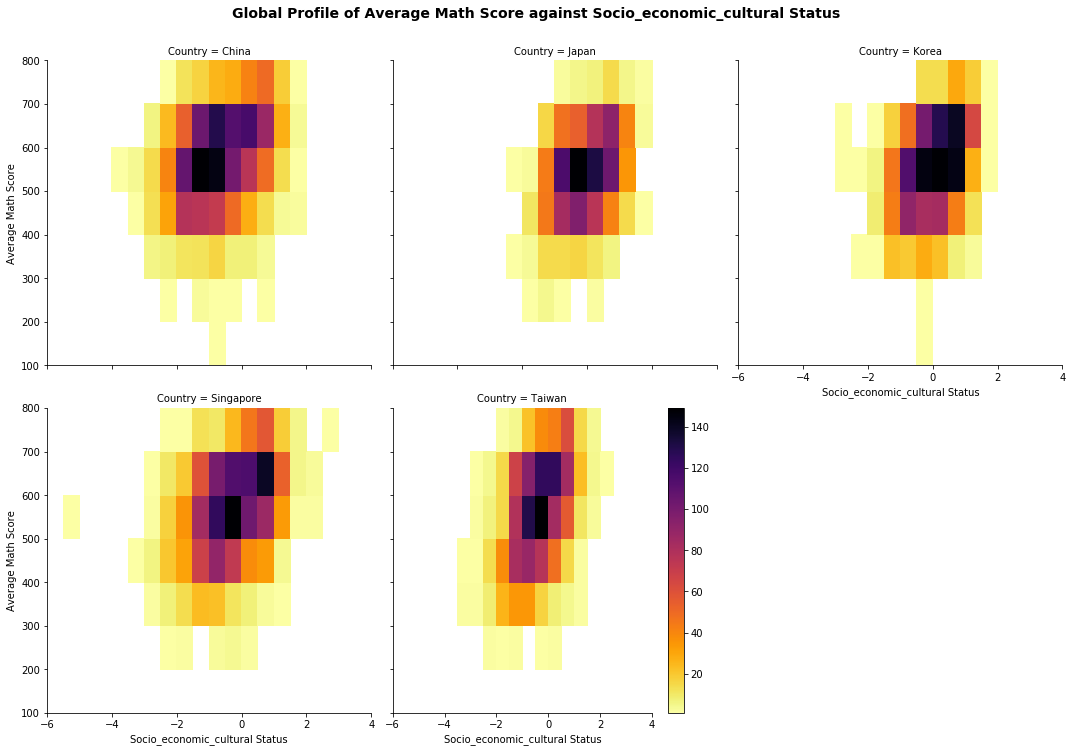

In [85]:

def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_y = np.arange(100, 800+50,100)
    bins_x = np.arange(-6, 4+0.5, 0.5)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    
# create faceted heat maps on socio_economic_cultural Status
g = sb.FacetGrid(data = df_new, col = 'Country', col_wrap = 3, height = 5)
g.map(hist2dgrid, 'Socio_economic_cultural Status','Average Math Score', color = 'inferno_r')
g.set_xlabels('Socio_economic_cultural Status')
g.set_ylabels('Average Math Score')
plt.suptitle("Global Profile of Average Math Score against Socio_economic_cultural Status", y = 1.04, fontsize = 14,weight = 'bold')
plt.colorbar()
plt.show();
    

## Average Math score vs Outside School Study Time Across countries
Again, the log transformation of average math scores against outside school study hours does not really reflect any picture of strong relationship. Across the countries, average math score has similar range of scores even though they spent long or short hours. 

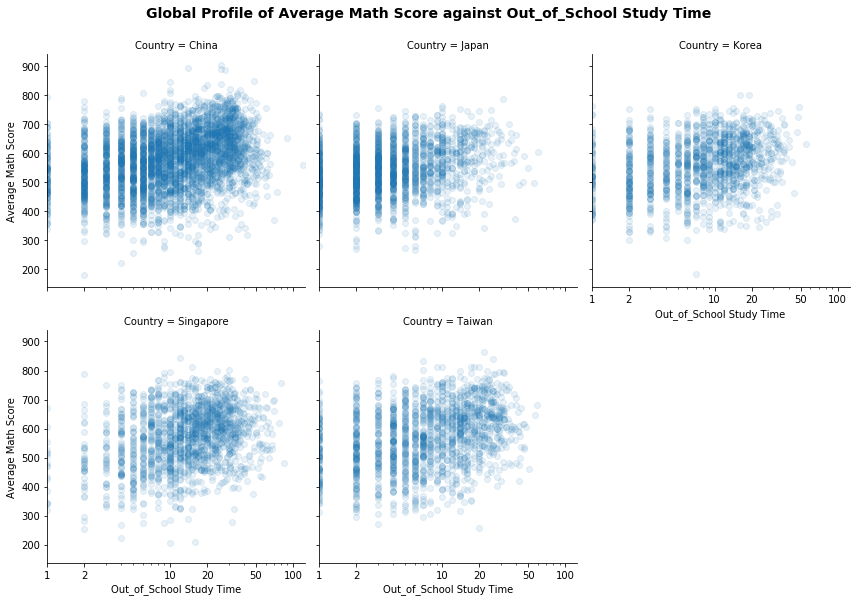

In [86]:
# Log transformation of x axis
g = sb.FacetGrid(data = df_new, col = 'Country', col_wrap = 3,size = 4,palette = 'vlag')
                  
g.map(plt.scatter,'Out_of_School Study Time','Average Math Score',alpha = 1/10)
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [1,2,10,20,50,100]
g.set(xticks = x_ticks, xticklabels = x_ticks )
plt.suptitle("Global Profile of Average Math Score against Out_of_School Study Time", y = 1.04, fontsize = 14,weight = 'bold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!